In [3]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("Director_actor_encoding.csv")

# 타겟 생성: 100만 관객 이상 흥행 여부
df["target_hit"] = (df["audiAcc"] >= 1000000).astype(int)

# 피처 선택
features = [
    "pair_target_enc", "salesAmt", "audiCnt", "scrnCnt", "showCnt", "showTm"
]
X = df[features].fillna(0)
y = df["target_hit"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 앙상블 모델 정의
model_lgb = LGBMClassifier()
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_cat = CatBoostClassifier(verbose=0)

ensemble_model = VotingClassifier(estimators=[
    ("lgb", model_lgb),
    ("xgb", model_xgb),
    ("cat", model_cat)
], voting="soft")

# 학습 및 예측
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

# 평가
print("정확도:", accuracy_score(y_test, y_pred))
print("\n분류 리포트:\n", classification_report(y_test, y_pred))


C:\Users\user\AppData\Local\Temp\ipykernel_14616\456875384.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Director_actor_encoding.csv")


[LightGBM] [Info] Number of positive: 6929, number of negative: 18209
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1407
[LightGBM] [Info] Number of data points in the train set: 25138, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275638 -> initscore=-0.966200
[LightGBM] [Info] Start training from score -0.966200


c:\Python 3.13.0\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


정확도: 0.9592680986475736

분류 리포트:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      4525
           1       0.90      0.96      0.93      1760

    accuracy                           0.96      6285
   macro avg       0.94      0.96      0.95      6285
weighted avg       0.96      0.96      0.96      6285



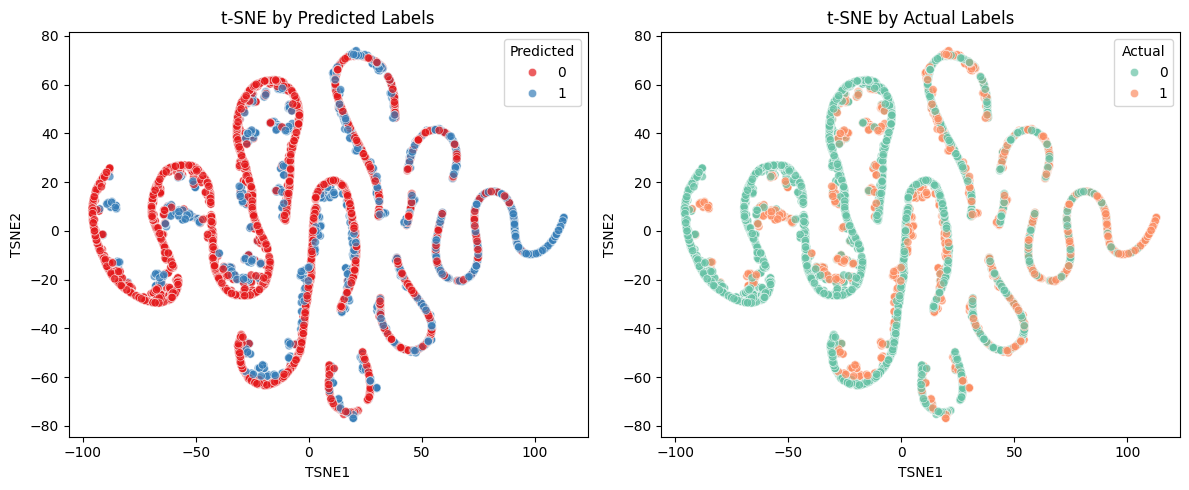

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# t-SNE를 이용한 시각화
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["Predicted"] = y_pred
tsne_df["Actual"] = y_test.values

# 시각화
plt.figure(figsize=(12, 5))

# 예측값 기준 시각화
plt.subplot(1, 2, 1)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Predicted", palette="Set1", alpha=0.7)
plt.title("t-SNE by Predicted Labels")

# 실제값 기준 시각화
plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Actual", palette="Set2", alpha=0.7)
plt.title("t-SNE by Actual Labels")

plt.tight_layout()
plt.show()